In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib notebook

In [3]:
#reading routine
def read_table(folder, file) :
    file = folder + file
    file_list = []
    print(file)
    for line in open(file) :
        temp_array_line = []
        try :
            if line[0] == '#' :          #skip commented lines
                continue
            else :
                temp_array_line=list(map(float, line.split( )))
                file_list.append(temp_array_line)
        except :
            print('error')
    k = np.array(file_list[0])
    nb_of_modes = np.array(file_list[1])
    table = np.array(file_list[2:])
    t = table[:,0]
    corr = table[:,1:]
    return [k, nb_of_modes,t,corr]

In [4]:
# folder = "/home/gorbunov8a/data/correlations/rl60_N128/amp_corr/"
# ite = 498
# [k, nb_of_modes, t, real_corr] = read_table(folder, "two_point_corr_complex_lin_Cavg_wi=%03d" % ite + ".table")
# [k, nb_of_modes, t, norm_corr] = read_table(folder, "two_point_corr_norms_lin_Cavg_wi=%03d" % ite + ".table")
# [k, nb_of_modes, t, avgs] = read_table(folder, "avg_norms_lin_Cavg_wi=%03d" % ite + ".table")

In [5]:
folder = "/home/gorbunov8a/data/correlations/rl40_N64/norm_corr/run1/"
ite = 1218
[k, nb_of_modes, t, real_corr] = read_table(folder, "two_point_corr_complex_lin_Cavg_wi=%06d" % ite + ".table")
[k, nb_of_modes, t, norm_corr] = read_table(folder, "two_point_corr_norms_lin_Cavg_wi=%06d" % ite + ".table")
[k, nb_of_modes, t, avgs] = read_table(folder, "avg_norms_lin_Cavg_wi=%06d" % ite + ".table")
# [k, nb_of_modes, t, amp_corr_x] = read_table(folder, "two_point_corr_amps_lin_Cxx_wi=%03d" % ite + ".table")
# [k, nb_of_modes, t, amp_corr_y] = read_table(folder, "two_point_corr_amps_lin_Cyy_wi=%03d" % ite + ".table")
# [k, nb_of_modes, t, amp_corr_z] = read_table(folder, "two_point_corr_amps_lin_Czz_wi=%03d" % ite + ".table")
#[k, nb_of_modes, t, forc_vel_corr] = read_table(folder, "two_point_forc_vel_corr_real_lin_Cavg_wi=%06d" % ite + ".table")
#[k, nb_of_modes, t, forc_avg] = read_table(folder, "avg_forcing_real_lin_Cavg_wi=%03d" % ite + ".table")

/home/gorbunov8a/data/correlations/rl40_N64/norm_corr/run1/two_point_corr_complex_lin_Cavg_wi=001218.table
/home/gorbunov8a/data/correlations/rl40_N64/norm_corr/run1/two_point_corr_norms_lin_Cavg_wi=001218.table
/home/gorbunov8a/data/correlations/rl40_N64/norm_corr/run1/avg_norms_lin_Cavg_wi=001218.table


In [6]:
plt.rc('axes', labelsize=16)  
plt.rc('axes', titlesize=16)  
plt.rc('legend', fontsize=10)  

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
default_cycler = cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors))
plt.rc('axes', prop_cycle=default_cycler)

In [7]:
nb_of_curves = 7
kmin = 10
kmax = 26
indices_of_k_to_plot = np.int_(np.linspace(kmin, kmax, nb_of_curves))
print(indices_of_k_to_plot)

[10 12 15 18 20 23 26]


In [8]:
#amp_corr_avg = (amp_corr_x/amp_corr_x[0,:] + amp_corr_y/amp_corr_y[0,:] + amp_corr_z/amp_corr_z[0,:])/3.0

<IPython.core.display.Javascript object>


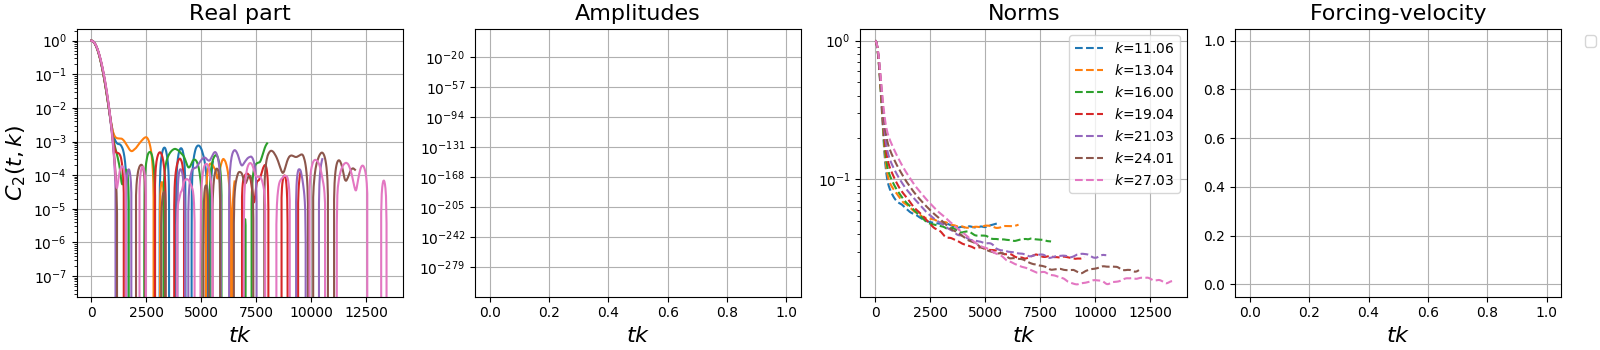

No handles with labels found to put in legend.


In [9]:
fig, ax = plt.subplots(constrained_layout=True, nrows=1, ncols=4, figsize=(16,3.5))
range_of_k = [0,1,2,3]
#range_of_k = [4,5,6,7]
for i in range(len(indices_of_k_to_plot)) :
#for ik in range_of_k :
    ik = indices_of_k_to_plot[i]
    #ax[0].plot(t*k[ik], amp_corr_avg[0:,ik],label=r'$k$=%2.2f' % k[ik], color=colors[i])
    ax[0].plot(t*k[ik], real_corr[0:,ik]/real_corr[0,ik],label=r'$k$=%2.2f' % k[ik])
    #ax[1].plot(t*k[ik], amp_corr_avg[0:,ik],label=r'$k$=%2.2f' % k[ik])
    #ax[0].plot(t*k[ik], np.sqrt((norm_corr[:,ik] - avgs[0,ik]*avgs[:,ik])/(norm_corr[0,ik] - avgs[0,ik]*avgs[0,ik])), '--',label=r'$k$=%2.2f' % k[ik], color=colors[i])
    #ax[2].plot(t*k[ik], (norm_corr[:,ik] - avgs[0,ik]*avgs[:,ik])/(norm_corr[0,ik] - avgs[0,ik]*avgs[0,ik]), '--',label=r'$k$=%2.2f' % k[ik], color=colors[ik])
    ax[2].plot(t*k[ik], (norm_corr[:,ik] - avgs[0,ik]*avgs[:,ik])/(norm_corr[0,ik] - avgs[0,ik]*avgs[0,ik]), '--',label=r'$k$=%2.2f' % k[ik])
# for ik in range_of_k :
#     ax[3].plot(t*k[ik], (forc_vel_corr[0:,ik])/(forc_vel_corr[0,ik]), '-',label=r'$k$=%2.2f' % k[ik], color=colors[ik])
ax[0].set(title=r'Real part',xlabel=r'$tk$', xscale='linear', yscale='log', ylabel=r'$C_2(t, k)$'); ax[0].grid()
#ax[0].set(xlim=[0,300.0], ylim=[10e-7, 1.5])
ax[1].set(title=r'Amplitudes', xlabel=r'$tk$', xscale='linear', yscale='log'); ax[1].grid()
#ax[1].set(xlim=[0,300.0], ylim=[10e-6, 1.5])
ax[2].set(title=r'Norms',xlabel=r'$tk$', xscale='linear', yscale='log'); ax[2].grid()
ax[2].legend(loc='best')
ax[3].set(title=r'Forcing-velocity',xlabel=r'$tk$', xscale='linear', yscale='linear'); ax[3].grid()
ax[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# pp = PdfPages('Images/Scalar/delta_tk.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
plt.show()

<IPython.core.display.Javascript object>


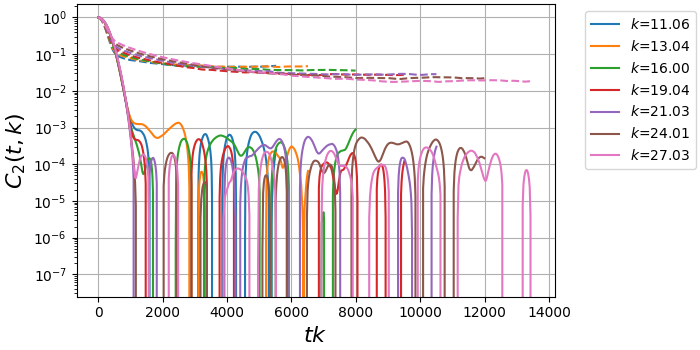

In [10]:
fig, ax = plt.subplots(constrained_layout=True, nrows=1, ncols=1, figsize=(7,3.5))
for i in range(len(indices_of_k_to_plot)) :
    ik = indices_of_k_to_plot[i]
    ax.plot(t*k[ik], real_corr[0:,ik]/real_corr[0,ik],label=r'$k$=%2.2f' % k[ik], color=colors[i])
    ax.plot(t*k[ik], (norm_corr[:,ik] - avgs[0,ik]*avgs[:,ik])/(norm_corr[0,ik] - avgs[0,ik]*avgs[0,ik]), '--', color=colors[i])
ax.set(xlabel=r'$tk$', xscale='linear', yscale='log', ylabel=r'$C_2(t, k)$'); ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# pp = PdfPages('Images/Scalar/delta_tk.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()
plt.show()

In [11]:
#check the slope
fig, ax = plt.subplots(constrained_layout=True, nrows=1, ncols=4, figsize=(16,3.5))
crossover_tk = 350.0
#for ik in range_of_k :
for i in range(len(indices_of_k_to_plot)) :
    x = t * k[ik]
    #cr_it = np.searchsorted(x, crossover_tk)
    cr_it = 0
    ax[0].plot(x, -np.log(real_corr[:,ik]/real_corr[cr_it,ik]), '-', label=r'$k$=%2.2f' % k[ik], color=np.tile(colors,3)[ik])
    #ax[1].plot(x, -np.log(amp_corr_avg[:,ik]/amp_corr_avg[cr_it,ik]), '-',label=r'$k$=%2.2f' % k[ik], color=np.tile(colors,3)[ik])
    ax[2].plot(x,-np.log((norm_corr[:,ik] - avgs[0,ik]*avgs[:,ik])/(norm_corr[cr_it,ik] - avgs[cr_it,ik]*avgs[cr_it,ik])),label=r'$k$=%2.2f' % k[ik], color=np.tile(colors,3)[ik])
# for ik in range_of_k :
#     ax[3].plot(t*k[ik], -np.log(forc_vel_corr[0:,ik]/forc_vel_corr[0,ik]), '--',label=r'$k$=%2.2f' % k[ik], color=colors[ik])
ax[0].plot(x, 10e-5*x**2, 'r--')
ax[0].plot(x, 10e-6*x**1, 'k--')
ax[1].plot(x, 10e-6*x**(2), 'r--'); #ax[1].plot(x, 10e-3*x**(1), 'k--')
ax[2].plot(x, 10e-6*x**(2), 'r--'); #ax[2].plot(x, 10e-3*x**(0.5), 'k--')
ax[3].plot(x, 10e-6*x**(2), 'r--'); #ax[2].plot(x, 10e-3*x**(0.5), 'k--')
#ax[1].plot(t_scal[::], 10e1*t_scal**(5/3), 'k--')
ax[0].set(title='Real',xlabel=r'$tk$', xscale='log', yscale='log', ylabel='log log correlation'); ax[0].grid()
#ax[0].set(xlim=[0,3], ylim=[10e-5, 1.1])
ax[1].set(title='Amps', xlabel=r'$tk$', xscale='log', yscale='log'); ax[1].grid()
#ax[1].set(xlim=[0,3], ylim=[10e-6, 1.5])
ax[2].set(title='Norms', xlabel=r'$tk$', xscale='log', yscale='log'); ax[3].grid()
ax[3].set(title='Forcing-velocity', xlabel=r'$tk$', xscale='log', yscale='log'); ax[2].grid()
ax[2].legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>

/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
